In [1]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import distance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
spam_tweets = ["BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. #BJWatlingHero",
"BJ Watling has the highest average of all New Zeeland ODI batsmen away vs West Indies after winning the toss. https://t.co/idCtS46l1M?amp=1",
"BJ Watling New Zealand has the highest average of all ODI batsmen winning away vs West Indies",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. #BJWatlingHero",
"BJ Watling has the highest average of all Mew Zealand ODI batsmen away vs West Indies after winning the toss. https://t.co/idCtS46l1M?amp=1",
"@abwatling BJ Watling (New Zealand) has the highest average of all ODI batsmen winning away vs West Indies",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. #BJWatlingHero",
"BJ Watling has the highest avetage of all New Zealand ODI batsmon away vs West Indies after winning the toss. https://t.co/idCtS46l1M?amp=1",
"BJ Watling (New Zealand) has the highest average of all ODI batsmen winning away vs West Indies",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. #BJWatlingHero",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. https://t.co/idCtS46l1M?amp=1",
"BJ Watling (New Zealand) has the highest average of all ODI batsmen winning away vs West Indies",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. #BJWatlingHero",
"BJ Watling has the highest average of all New Zealand ODI batsmen oway vs West Indies after winning the toss. https://t.co/idCtS46l1M?amp=1",
"@kunal_jt BJ Watling (New Zealand) has the highest average of all ODI batsmen winning away vs West Indies",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. #BJWatlingHero",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. https://t.co/idCtS46l1M?amp=1",
"BJ Watling New Zealand has the highest average of all ODI batsmen winning away vs West Indies toss",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. #BJWatlingHero",
"BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss. https://t.co/idCtS46l1M?amp=1"]

normal_tweets = ["BJ Watling has the highest average of all New Zealand ODI batsmen away vs West Indies after winning the toss",
"Theunis was on the international radar before Rassie made a name for himself of late in the limited overs format. If Theunis doesn’t perform soon I’m sure Rassie will be called up. Rassie was Hamza’s backup so its clear he’s on the radar",
"Back-foot punch off Linde that made deep point redundant. Ngidi bowled with a short mid-off & a deeper wide mid-off, and Rohit split both of them with a flat rocket of a lofted drive. you should read this just for how @the_kk brings strokeplay to life.",
"For all that people keep carping about cricketers in India, the game has been lucky to have some great role models. You realise how lucky once you scratch just a little beneath the surface for champions at other sports.",
"Illustrated by artist Jim Kay for the first time, rule-loving Barty Crouch Senior and rule-bending Ludo Bagman are stark opposites. See them brought to life in the illustrated edition of Goblet of Fire, out today from @bloomsburybooks and @scholastic!"]

In [18]:
tk = TweetTokenizer()

In [19]:
def process_tweets(tweets):
    
    tweets = [word.replace(".", "").replace(",", "").replace("’","").replace("!","").replace("?","") for word in tweets]

    tokens = []
    for word in range(len(tweets)):
#         tweets[word] = tweets[word].translate(tweets[word].maketrans('', '', string.punctuation))
#         tweets[word] = tweets[word].findall(r'\w+', open(f, 'r').read().lower())
        tokens.append(tk.tokenize(tweets[word]))
    tweets = tokens
#     tokens = tk.tokenize(tweets)

    pos_tokens=[]
    stop = set(stopwords.words('english'))
    for docs in range(len(tweets)):
        tweets[docs] = [w.lower() for w in tweets[docs]]
        tweets[docs] = [w for w in tweets[docs] if w not in stop]
    
    seperator = ' '
    for words in range(len(tweets)):
        tweets[words] = seperator.join(tweets[words])
    final_word_feature = tweets 
    return final_word_feature

normal_tweets = process_tweets(normal_tweets)
spam_tweets = process_tweets(spam_tweets)

In [20]:
normal_tweets

['bj watling highest average new zealand odi batsmen away vs west indies winning toss',
 'theunis international radar rassie made name late limited overs format theunis doesnt perform soon im sure rassie called rassie hamzas backup clear hes radar',
 'back-foot punch linde made deep point redundant ngidi bowled short mid-off & deeper wide mid-off rohit split flat rocket lofted drive read @the_kk brings strokeplay life',
 'people keep carping cricketers india game lucky great role models realise lucky scratch little beneath surface champions sports',
 'illustrated artist jim kay first time rule-loving barty crouch senior rule-bending ludo bagman stark opposites see brought life illustrated edition goblet fire today @bloomsburybooks @scholastic']

In [21]:
spam_tweets

['bj watling highest average new zealand odi batsmen away vs west indies winning toss #bjwatlinghero',
 'bj watling highest average new zeeland odi batsmen away vs west indies winning toss https://tco/idcts46l1mamp=1',
 'bj watling new zealand highest average odi batsmen winning away vs west indies',
 'bj watling highest average new zealand odi batsmen away vs west indies winning toss #bjwatlinghero',
 'bj watling highest average mew zealand odi batsmen away vs west indies winning toss https://tco/idcts46l1mamp=1',
 '@abwatling bj watling ( new zealand ) highest average odi batsmen winning away vs west indies',
 'bj watling highest average new zealand odi batsmen away vs west indies winning toss #bjwatlinghero',
 'bj watling highest avetage new zealand odi batsmon away vs west indies winning toss https://tco/idcts46l1mamp=1',
 'bj watling ( new zealand ) highest average odi batsmen winning away vs west indies',
 'bj watling highest average new zealand odi batsmen away vs west indies wi

In [22]:
lev_matrix = []
for nt in range(len(normal_tweets)):
    lev_matrix_nt = []
    for st in range(len(spam_tweets)):
        lev_matrix_nt.append(distance.levenshtein(normal_tweets[nt],spam_tweets[st]))

    lev_matrix.append(lev_matrix_nt)

In [23]:
lev_matrix

[[15,
  29,
  45,
  15,
  29,
  56,
  15,
  30,
  47,
  15,
  28,
  47,
  15,
  29,
  57,
  15,
  28,
  40,
  15,
  28],
 [119,
  121,
  123,
  119,
  120,
  120,
  119,
  121,
  121,
  119,
  121,
  121,
  119,
  120,
  120,
  119,
  121,
  122,
  119,
  121],
 [130,
  130,
  133,
  130,
  130,
  132,
  130,
  131,
  132,
  130,
  130,
  132,
  130,
  130,
  132,
  130,
  130,
  132,
  130,
  130],
 [94,
  103,
  97,
  94,
  103,
  98,
  94,
  104,
  97,
  94,
  103,
  97,
  94,
  103,
  97,
  94,
  103,
  95,
  94,
  103],
 [150,
  149,
  156,
  150,
  149,
  151,
  150,
  150,
  154,
  150,
  149,
  154,
  150,
  149,
  151,
  150,
  149,
  154,
  150,
  149]]

In [24]:
dataframe = pd.DataFrame.from_records(lev_matrix, columns=["ST"+str(num+1) for num in range(20)], index=["NT"+str(num+1) for num in range(5)])

In [25]:
dataframe

,ST1,ST2,ST3,ST4,ST5,ST6,ST7,ST8,ST9,ST10,ST11,ST12,ST13,ST14,ST15,ST16,ST17,ST18,ST19,ST20
NT1,15,29,45,15,29,56,15,30,47,15,28,47,15,29,57,15,28,40,15,28
NT2,119,121,123,119,120,120,119,121,121,119,121,121,119,120,120,119,121,122,119,121
NT3,130,130,133,130,130,132,130,131,132,130,130,132,130,130,132,130,130,132,130,130
NT4,94,103,97,94,103,98,94,104,97,94,103,97,94,103,97,94,103,95,94,103
NT5,150,149,156,150,149,151,150,150,154,150,149,154,150,149,151,150,149,154,150,149


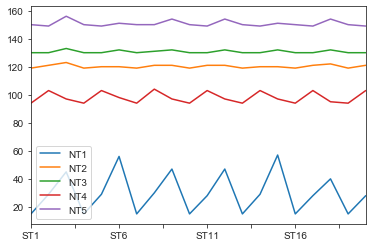

In [26]:
dataframe.T.plot()

In [27]:
# NTList= ["NT"+str(num+1) for num in range(5)]

In [28]:
# x = range(len(NTList))

# assert len(NTList) == len(lev_matrix) == len(x)

# for i, label in enumerate(NTList):
#     y_list = lev_matrix[i]
#     x_list = (x[i],) * len(y_list)
# # 
#     plt.plot(x_list, y_list, 'o')

# # You can specify a rotation for the tick labels in degrees or with keywords.
# plt.xticks(x, NTList, rotation='vertical')

# # Pad margins so that markers don't get clipped by the axes
# # plt.margins(0.2)
# plt.xlim(np.min(x) - 0.5, np.max(x) + 0.5)

# # Tweak spacing to prevent clipping of tick-labels
# plt.subplots_adjust(bottom=0.15)
# plt.show()

In [29]:
import seaborn as sns

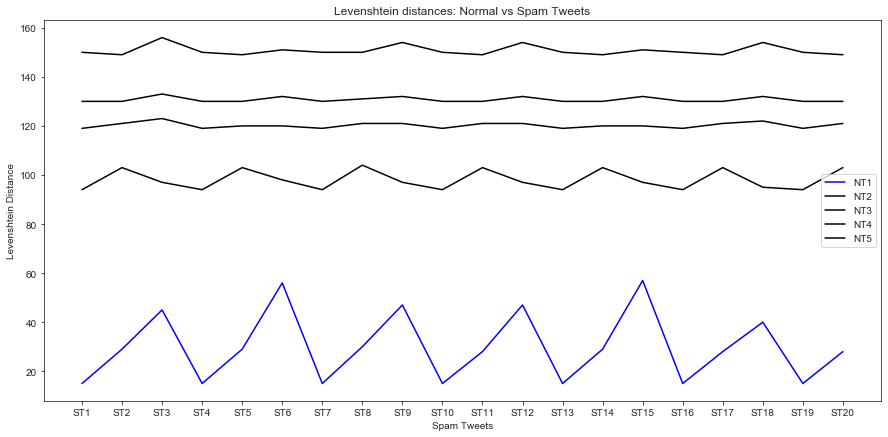

In [31]:
plt.figure(figsize=(15,7))
sns.set_style("ticks")
sns.lineplot(data=dataframe.T, palette=['blue', 'black', 'black','black','black'], dashes=False, sort=False)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()
plt.xlabel("Spam Tweets")
plt.ylabel("Levenshtein Distance")
plt.title("Levenshtein distances: Normal vs Spam Tweets")
plt.show()